In [ ]:
!pip install tensorflow tensorflow-gpu 

In [ ]:
!pip3 install opencv-python

In [ ]:
import tensorflow as tf
import os

In [ ]:
os.path.join('data','happy')

In [ ]:
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [ ]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [ ]:
data_dir='data'



In [ ]:
image_exts=['jpeg','jpg','bmp','png']

In [ ]:
image_exts[2]

In [ ]:
os.listdir((data_dir))

In [ ]:
for image_class in os.listdir(data_dir):
    print(image_class)

In [ ]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))

In [ ]:
img=cv2.imread(os.path.join('data','happy','1-2.jpg'))

In [ ]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data =tf.keras.utils.image_dataset_from_directory('data')

In [ ]:
data_iterator=data.as_numpy_iterator()# we cant access data directly so we use this

In [ ]:
data_iterator

In [19]:

# get another batch from iterator

batch=data_iterator.next() #used to access pipelined data

In [20]:
batch # images represented as arrays

(array([[[[ 45.158203 ,  45.158203 ,  45.158203 ],
          [ 45.30078  ,  45.30078  ,  45.30078  ],
          [ 36.208984 ,  36.208984 ,  36.208984 ],
          ...,
          [ 55.46875  ,  55.46875  ,  55.46875  ],
          [ 57.97461  ,  57.97461  ,  57.97461  ],
          [ 49.689453 ,  49.689453 ,  49.689453 ]],
 
         [[ 44.25     ,  44.25     ,  44.25     ],
          [ 44.277344 ,  44.277344 ,  44.277344 ],
          [ 40.410156 ,  40.410156 ,  40.410156 ],
          ...,
          [ 52.220703 ,  52.220703 ,  52.220703 ],
          [ 60.875    ,  60.875    ,  60.875    ],
          [ 49.47461  ,  49.47461  ,  49.47461  ]],
 
         [[ 48.66797  ,  48.66797  ,  48.66797  ],
          [ 48.845703 ,  48.845703 ,  48.845703 ],
          [ 45.441406 ,  45.441406 ,  45.441406 ],
          ...,
          [ 56.76758  ,  56.76758  ,  56.76758  ],
          [ 58.28125  ,  58.28125  ,  58.28125  ],
          [ 55.583984 ,  55.583984 ,  55.583984 ]],
 
         ...,
 
         [[ 

In [21]:
#class 1 =sad
#class 2=happy
batch[1]


array([1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1])

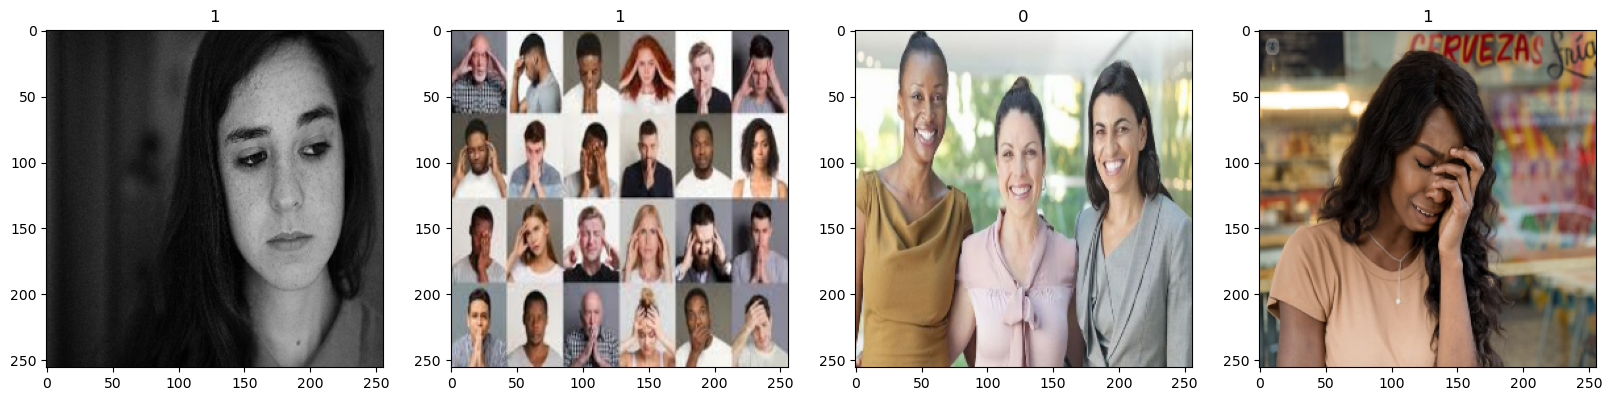

In [22]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [23]:
data=data.map(lambda x,y: (x/255,y)) # x-img y-label

In [24]:
data.as_numpy_iterator().next()

(array([[[[3.13725509e-02, 5.86780012e-02, 0.00000000e+00],
          [3.22457105e-02, 5.44653796e-02, 1.74632354e-03],
          [3.92156877e-02, 5.09803928e-02, 1.71415433e-02],
          ...,
          [7.33333349e-01, 5.19102335e-01, 1.60056680e-01],
          [7.26363361e-01, 5.03707111e-01, 1.50329351e-01],
          [7.14162052e-01, 4.90632653e-01, 1.37691483e-01]],
 
         [[2.91283708e-02, 5.64338230e-02, 0.00000000e+00],
          [3.00015323e-02, 5.22212014e-02, 1.49648334e-03],
          [3.69715057e-02, 4.83198129e-02, 1.53137660e-02],
          ...,
          [7.48626173e-01, 5.34395158e-01, 1.75349534e-01],
          [7.44066954e-01, 5.21410704e-01, 1.68032944e-01],
          [7.29954600e-01, 5.06425202e-01, 1.53484017e-01]],
 
         [[2.74509806e-02, 5.36722951e-02, 4.17821539e-05],
          [2.83241421e-02, 5.05438112e-02, 2.56100832e-03],
          [3.52941193e-02, 4.63311896e-02, 1.57816261e-02],
          ...,
          [7.61055052e-01, 5.46824038e-01, 1.8777

In [25]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [26]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [28]:
model = Sequential()

In [29]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [30]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [32]:
logdir='logs'

In [33]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [34]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 13s 1s/step - loss: 0.9591 - accuracy: 0.5134 - val_loss: 0.6933 - val_accuracy: 0.5156
Epoch 2/20
7/7 [==============================] - 10s 1s/step - loss: 0.6827 - accuracy: 0.5848 - val_loss: 0.6474 - val_accuracy: 0.5156
Epoch 3/20
7/7 [==============================] - 10s 1s/step - loss: 0.6227 - accuracy: 0.5982 - val_loss: 0.5774 - val_accuracy: 0.7188
Epoch 4/20
7/7 [==============================] - 10s 1s/step - loss: 0.5046 - accuracy: 0.7991 - val_loss: 0.3887 - val_accuracy: 0.8906
Epoch 5/20
7/7 [==============================] - 10s 1s/step - loss: 0.4071 - accuracy: 0.8438 - val_loss: 0.3033 - val_accuracy: 0.9062
Epoch 6/20
7/7 [==============================] - 10s 1s/step - loss: 0.2656 - accuracy: 0.9152 - val_loss: 0.2206 - val_accuracy: 0.9062
Epoch 7/20
7/7 [==============================] - 10s 1s/step - loss: 0.2341 - accuracy: 0.9107 - val_loss: 0.1991 - val_accuracy: 0.9375
Epoch 8/20
7/7 [==================

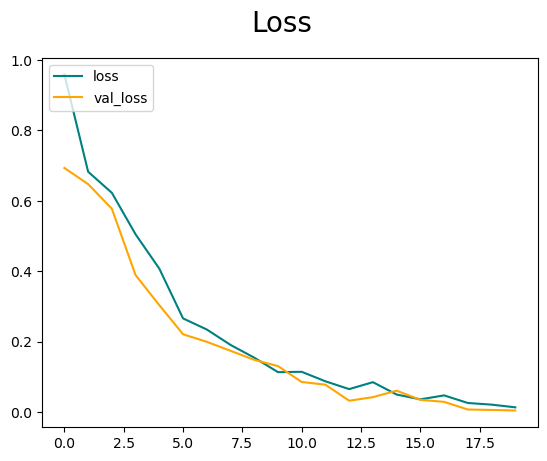

In [49]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [50]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [51]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [52]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
    

1/1 [==============================] - 0s 49ms/step


In [53]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


In [54]:
import cv2

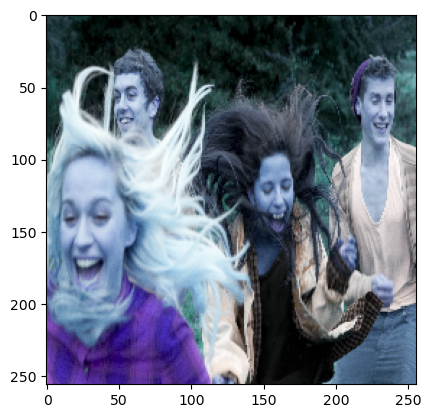

In [56]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [57]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 47ms/step


In [58]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


In [45]:
import pickle

In [59]:
from tensorflow.keras.models import load_model


In [70]:
model.save(os.path.join('models','happysad.hdf5'))

In [71]:
new_model = load_model(os.path.join('models','happysad.hdf5'))

In [72]:
final=new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 157ms/step


In [73]:
if final > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy
